<a href="https://colab.research.google.com/github/kenclements/praxis/blob/main/imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Feb 20 20:36:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P0    30W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import string
import re

#Vectorization and Tokenizing
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import MaxAbsScaler



#Models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression


#Metrics and Testing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Praxis/data/IMDB Dataset.csv')



In [ ]:
df.rename(columns={"review": "body_anon", "sentiment": "label"}, inplace=True)

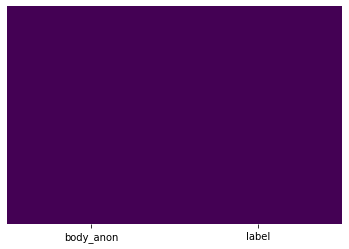

In [ ]:
sb.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df['label']

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: label, Length: 50000, dtype: object

In [ ]:
df.dropna(subset=['label'], inplace=True)


In [ ]:
#df['body_anon'] = df['body_anon'].astype(str)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer


In [ ]:
df

,body_anon,label
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
def prep(dfx):
    dfx1 = [re.sub(r'[^\w\s]','', x) for x in dfx]
    dfx1 = ''.join(dfx1)
    return(dfx1)

df = df['body_anon'].apply(prep)

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
def prepare_text(pretext):

    # tokenize mission.
    tokens = word_tokenize(pretext, language="english", preserve_line=True)

    # Parts of speech (POS) tag tokens.
    token_tag = pos_tag(tokens)
    
    # Only include some of the POS tags.
    include_tags = ['VBN', 'VBD', 'JJ', 'JJS', 'JJR', 'CD', 'NN', 'NNS', 'NNP', 'NNPS']
    filtered_tokens = (tok for tok, tag in token_tag if tag in include_tags)    
    #stem words.
    stemmed_tokens = (lancaster.stem(tok) for tok in filtered_tokens)

    #lemm words.
    lemmed_words = (lemmatizer.lemmatize(tok) for tok in stemmed_tokens)

    lower_words = [str.lower(tok) for tok in lemmed_words]

    #x = cv.fit_transform(tokens).toarray()

    joined = " ".join(lower_words);

    return(joined)

#ps = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()
    
df['tokenized'] = df['body_anon'].apply(prepare_text)



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
df.head(1)


,body_anon,label,tokenized
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...


In [ ]:
#countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
tfidfvectorizer = TfidfVectorizer(stop_words=None, analyzer='word' )

In [ ]:
#count_wm = countvectorizer.fit_transform(df['body_anon'])
tfidf_wm = tfidfvectorizer.fit_transform(df['tokenized'])


In [ ]:
df = df.reset_index(drop=True)


In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(tfidf_wm, df['label'], test_size=.3) # 70% training and 30% test


ADABOOST MODEL

In [ ]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1) 
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.799


In [ ]:
confusion_matrix(y_test, y_pred)

array([[5757, 1823],
       [1192, 6228]])

KNN Model

In [ ]:
K = []
training = []
test = []
scores = {}
  
for k in range(2, 5):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
  
    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [ ]:
scores

{2: [0.9778571428571429, 0.5562666666666667],
 3: [0.9632285714285714, 0.5599333333333333],
 4: [0.694, 0.5334]}

In [ ]:
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
y_pred

array(['negative', 'negative', 'positive', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[7104,  513],
       [6143, 1240]])

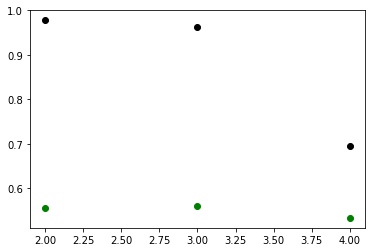

In [ ]:
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()
# For overlapping scatter plots

In [ ]:
svm = SVC(kernel="poly", degree=1, gamma="scale")

In [ ]:
svm.fit(X_train, y_train)

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[568, 118],
       [268,  34]], dtype=int64)

In [ ]:
y_train_hat_probs = lr.predict_proba(X_test)[:,1]

In [ ]:
nb = GaussianNB()

In [ ]:
nb.fit(X_train.toarray(), y_train)

GaussianNB()

In [ ]:
y_pred = nb.predict(X_test.toarray())

In [ ]:
confusion_matrix(y_test, y_pred)

array([[259, 427],
       [184, 118]], dtype=int64)